<a href="https://colab.research.google.com/github/nair-jishnu/Data-Analysis/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

Saving formatted_flights.csv to formatted_flights.csv


In [0]:
import pandas as pd

In [0]:
flights = pd.read_csv('formatted_flights.csv')

In [0]:
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [0]:
import matplotlib.pyplot as plt

In [0]:
import seaborn as sns

(array([  276.,   636.,  1394.,  2820.,  5339.,  9420., 15551., 23546.,
        31319., 34857., 33790., 29786., 24391., 19028., 14894., 11324.,
         8815.,  7159.,  5908.,  4896.,  4130.,  3630.,  3139.,  2782.,
         2455.,  2179.,  1973.,  1805.,  1646.,  1454.,  1360.,  1286.,
         1167.,  1013.,   945.,  1000.]),
 array([-60., -55., -50., -45., -40., -35., -30., -25., -20., -15., -10.,
         -5.,   0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,
         50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.,
        105., 110., 115., 120.]),
 <a list of 36 Patch objects>)

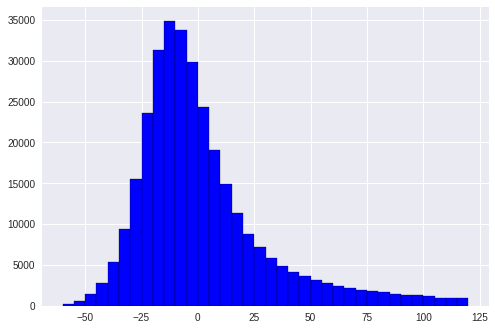

In [0]:
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


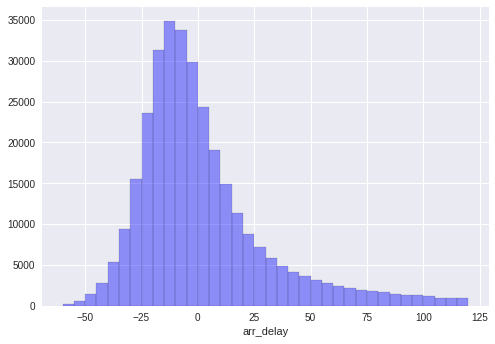

In [0]:
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

Text(0.5, 1.0, 'Histogram of Arrival Delays')

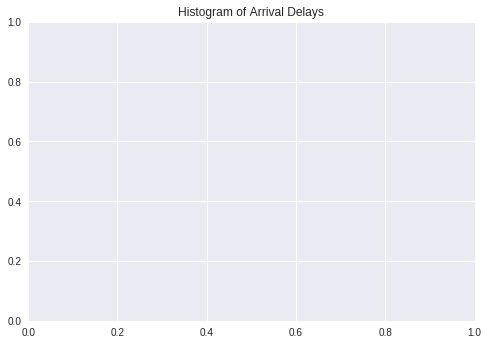

In [0]:
plt.title('Histogram of Arrival Delays')

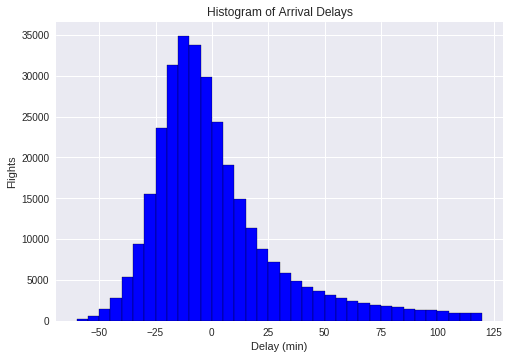

In [0]:
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


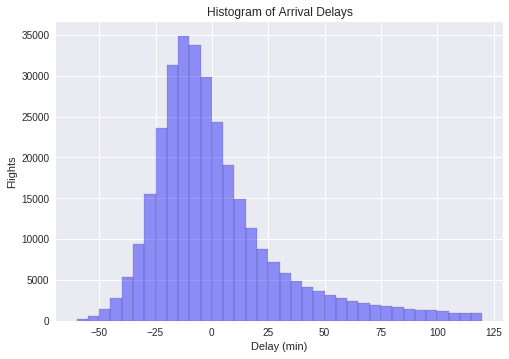

In [0]:
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)'); plt.ylabel('Flights');

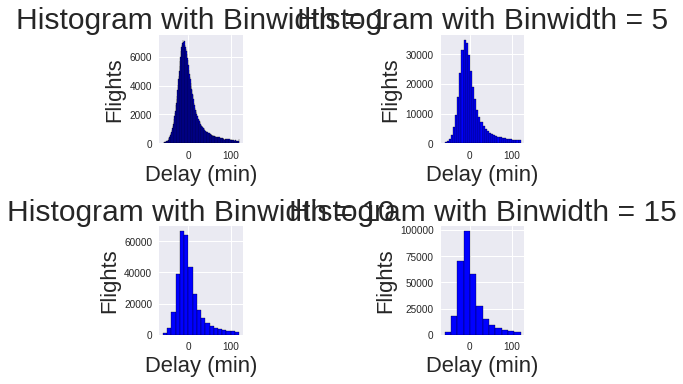

In [0]:
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 30)
    ax.set_xlabel('Delay (min)', size = 22)
    ax.set_ylabel('Flights', size= 22)

plt.tight_layout()
plt.show()

In [0]:
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])


In [0]:
carrier_flights = pd.Series(flights.groupby('name')['name'].count())
carrier_flights = carrier_flights.sort_values(ascending=False)
top_five = carrier_flights.index[:5]

# Subset to the top 5 airlines
top_five_flights = flights[flights['name'].isin(top_five)]

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


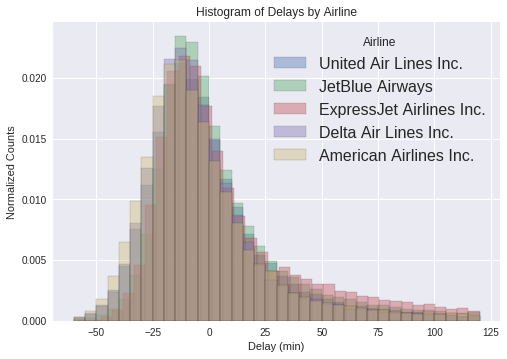

In [0]:
for airline in top_five:
    # Subset to the airline
    subset = top_five_flights[top_five_flights['name'] == airline]
    # Make a histogram with the airline
    sns.distplot(subset['arr_delay'], bins = int(180/5), 
                 label = airline, hist = True, kde = False, 
                 norm_hist=True, 
                 hist_kws = {'edgecolor': 'black'})
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Histogram of Delays by Airline'); plt.xlabel('Delay (min)'); plt.ylabel('Normalized Counts');

In [0]:
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


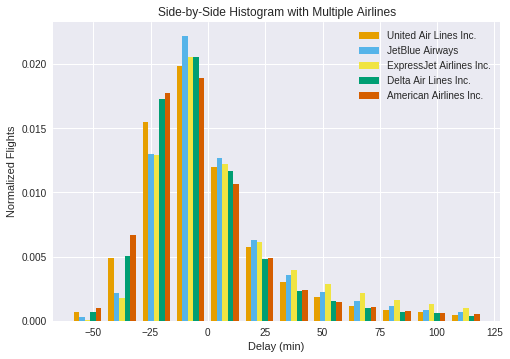

In [0]:
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), normed=True,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines');

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


([array([0.00017083, 0.00116771, 0.00370547, 0.00476932, 0.00287629,
         0.00138281, 0.00072901, 0.00044126, 0.00027838, 0.00020857,
         0.00015579, 0.00010755]),
  array([0.00023071, 0.0016487 , 0.00660049, 0.00970267, 0.00570491,
         0.0027801 , 0.00152895, 0.0009407 , 0.00061805, 0.00046169,
         0.0003462 , 0.00026164]),
  array([0.00024915, 0.00202385, 0.00927559, 0.01396092, 0.00822649,
         0.00405252, 0.00234649, 0.00154172, 0.00106158, 0.00080392,
         0.00061266, 0.00047276]),
  array([0.00038905, 0.00302385, 0.01269644, 0.01803103, 0.01054121,
         0.00500826, 0.00281074, 0.00184167, 0.00125143, 0.00094183,
         0.0007256 , 0.00055278]),
  array([0.00051816, 0.00391319, 0.01505031, 0.02054609, 0.01195296,
         0.0056544 , 0.00312885, 0.00203719, 0.00139359, 0.00104314,
         0.00080591, 0.00062288])],
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 Lists of Patches objects

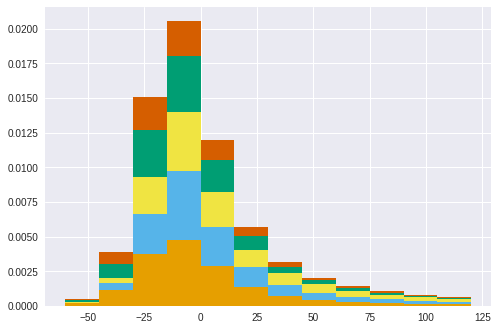

In [0]:
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True,
         normed=True, color = colors, label=names)


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


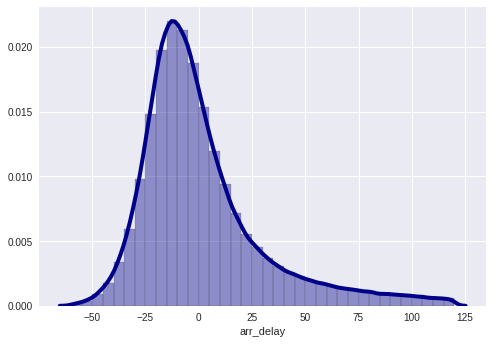

In [0]:
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

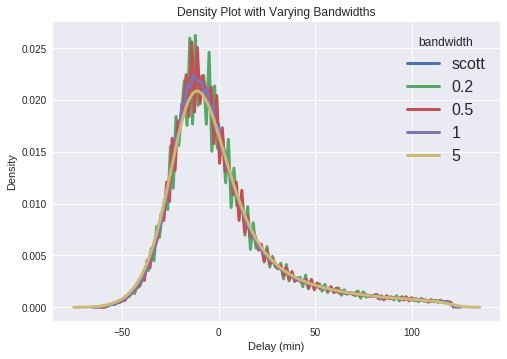

In [0]:
for bandwidth in ['scott', 0.2, 0.5, 1, 5]:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'bw': bandwidth, 'linewidth': 3},
                 label = bandwidth)
    
plt.legend(prop={'size': 16}, title = 'bandwidth')
plt.title('Density Plot with Varying Bandwidths'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

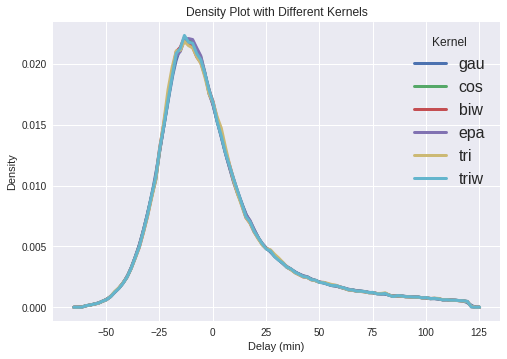

In [0]:
for kernel in ['gau', 'cos', 'biw', 'epa', 'tri', 'triw']:
    sns.distplot(flights['arr_delay'], hist = False, kde = True, 
                 kde_kws={'kernel': kernel, 'linewidth': 3},
                 label = kernel)
    
plt.legend(prop={'size': 16}, title = 'Kernel')
plt.title('Density Plot with Different Kernels'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');

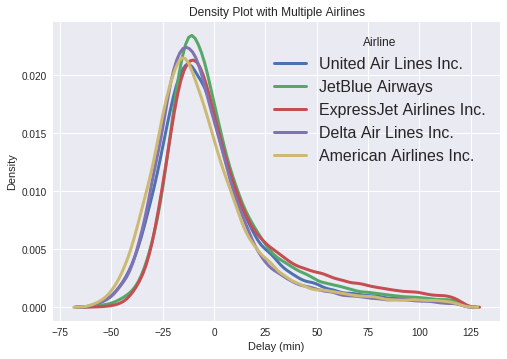

In [0]:
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the top five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines'); 
plt.xlabel('Delay (min)')
plt.ylabel('Density');

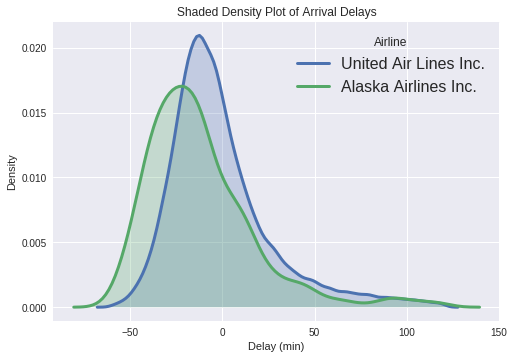

In [0]:
for airline in ['United Air Lines Inc.', 'Alaska Airlines Inc.']:
    subset = flights[flights['name'] == airline]
    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = airline)
    
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Shaded Density Plot of Arrival Delays'); 
plt.xlabel('Delay (min)'); plt.ylabel('Density');


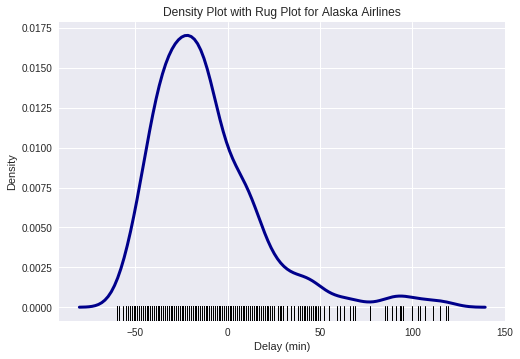

In [0]:
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines');
plt.xlabel('Delay (min)'); plt.ylabel('Density');